# Results for TENCON 2024 paper
## Experiment 3: Effect of Target Density

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Box Plots with Error Bars for Effect of Target Density

Directory /home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_1target does not exist. Skipping.
Directory /home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_10targets does not exist. Skipping.
Directory /home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_1target does not exist. Skipping.
Directory /home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_10targets does not exist. Skipping.


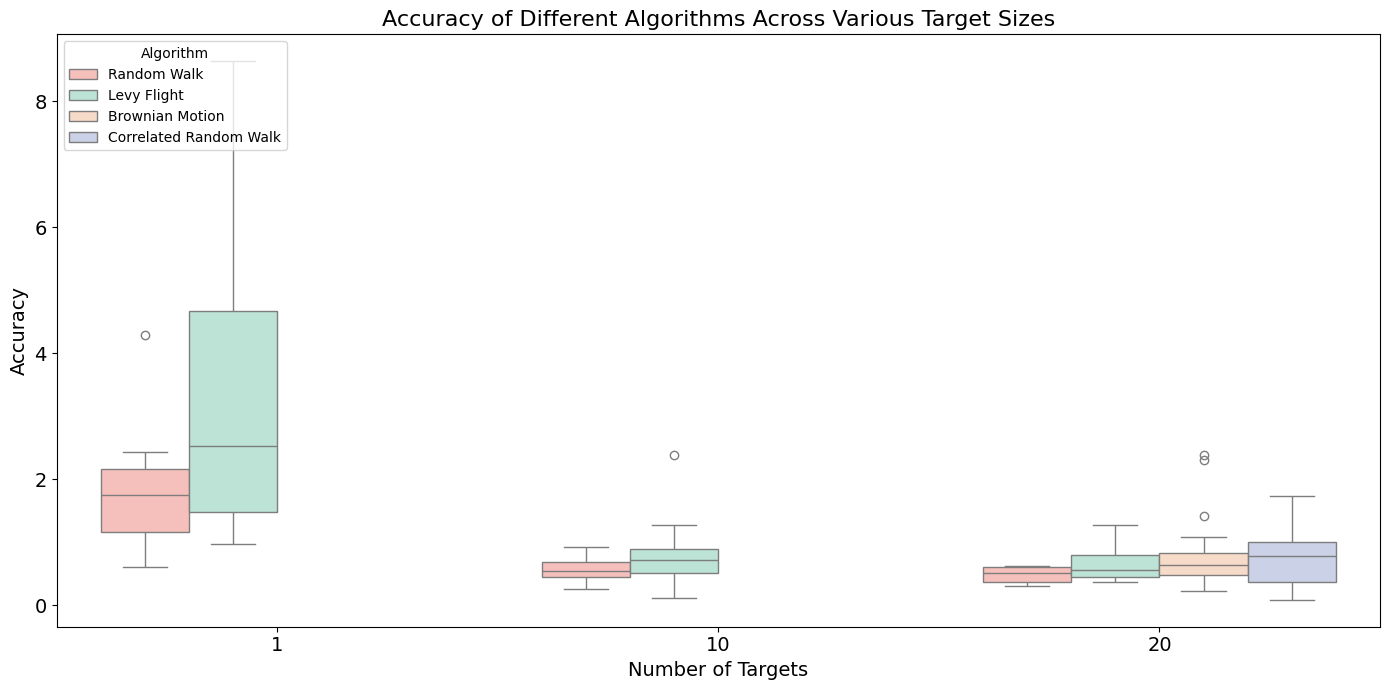

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} does not exist. Skipping.")
        return accuracies

    run_dirs = sorted(os.listdir(base_dir))

    for run_dir in run_dirs:
        run_path = os.path.join(base_dir, run_dir, 'e-puck.csv')
        if os.path.isfile(run_path):
            try:
                if skip_lines:
                    df = pd.read_csv(run_path, skip_blank_lines=True)
                else:
                    df = pd.read_csv(run_path)

                final_average_count = df['average_count'].iloc[-1]
                accuracy = final_average_count / actual_black_tiles
                accuracies.append(accuracy)
            except Exception as e:
                print(f"Error reading {run_path}: {e}")
    
    return accuracies

# Directories for each algorithm and target size
algorithms = ["Random Walk", "Levy Flight", "Brownian Motion", "Correlated Random Walk"]
target_sizes = [1, 10, 20]
base_dirs = {
    "Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets"
    },
    "Levy Flight": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets"
    },
    "Brownian Motion": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets"
    },
    "Correlated Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
    }
}

# Actual number of black tiles
actual_black_tiles = {1: 1, 10: 10, 20: 20}

# Collect accuracy data
data = []

for algorithm in algorithms:
    for target_size in target_sizes:
        if target_size in base_dirs[algorithm]:
            dir_path = base_dirs[algorithm][target_size]
            accuracies = read_accuracy_data(dir_path, actual_black_tiles[target_size], skip_lines=(algorithm in ["Random Walk", "Levy Flight"]))
            for accuracy in accuracies:
                data.append({"Algorithm": algorithm, "Target Size": target_size, "Accuracy": accuracy})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the accuracies using box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Target Size', y='Accuracy', hue='Algorithm', data=df, palette=pastel_palette)

# Adding labels and title
plt.title('Accuracy of Different Algorithms Across Various Target Sizes', fontsize=16)
plt.xlabel('Number of Targets', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Algorithm', fontsize=10, loc='upper left')
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()
